In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.naive_bayes import GaussianNB


In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/archive (1) (2).zip")
dff = df

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.shape

(918, 12)

In [ ]:
df.shape

(918, 12)

In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
sc = LabelEncoder()

In [ ]:
df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [ ]:
df['ChestPainType']=sc.fit_transform(df['ChestPainType'])
df['ChestPainType'].unique()

array([1, 2, 0, 3])

In [ ]:
df['Sex'].unique()

array(['M', 'F'], dtype=object)

In [ ]:
df['Sex']=sc.fit_transform(df['Sex'])
df['Sex'].unique()

array([1, 0])

In [ ]:
df['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [ ]:
df['RestingECG']=sc.fit_transform(df['RestingECG'])
df['RestingECG'].unique()

array([1, 2, 0])

In [ ]:
df['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [ ]:
df['ST_Slope']=sc.fit_transform(df['ST_Slope'])
df['ST_Slope'].unique()

array([2, 1, 0])

In [ ]:
df['ExerciseAngina'].unique()


array(['N', 'Y'], dtype=object)

In [ ]:
df['ExerciseAngina']=sc.fit_transform(df['ExerciseAngina'])
df['ExerciseAngina'].unique()

array([0, 1])

In [ ]:
A=df.drop(labels='HeartDisease',axis=1)
B=df['HeartDisease']

In [ ]:
A

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1
914,68,1,0,144,193,1,1,141,0,3.4,1
915,57,1,0,130,131,0,1,115,1,1.2,1
916,57,0,1,130,236,0,0,174,0,0.0,1


In [ ]:
import seaborn as sns


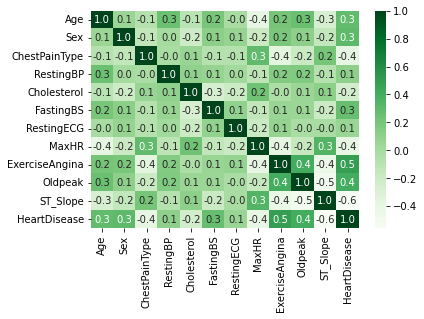

In [ ]:
correlation=df.corr()
sns.heatmap(correlation,annot=True,fmt=".1f",cmap='Greens')

In [ ]:
scaler= StandardScaler()

A_stand = scaler.fit_transform(A)
print(A_stand)

[[-1.4331398   0.51595242  0.22903206 ... -0.8235563  -0.83243239
   1.05211381]
 [-0.47848359 -1.93816322  1.27505906 ... -0.8235563   0.10566353
  -0.59607813]
 [-1.75135854  0.51595242  0.22903206 ... -0.8235563  -0.83243239
   1.05211381]
 ...
 [ 0.37009972  0.51595242 -0.81699495 ...  1.21424608  0.29328271
  -0.59607813]
 [ 0.37009972 -1.93816322  0.22903206 ... -0.8235563  -0.83243239
  -0.59607813]
 [-1.64528563  0.51595242  1.27505906 ... -0.8235563  -0.83243239
   1.05211381]]


In [ ]:
A_train,A_test,B_train,B_test=train_test_split(A_stand,B,test_size=0.2,random_state=42)


In [ ]:
A_train.shape


(734, 11)

In [ ]:
A_test.shape


(184, 11)

In [ ]:
gnb = GaussianNB()
gnb.fit(A_train, B_train)


N_test_predict=gnb.predict(A_test)
N_train_predict=gnb.predict(A_train)

print("Test accuracy",accuracy_score(B_test,N_test_predict))
print("Train accuracy", accuracy_score(B_train,N_train_predict))

Test accuracy 0.842391304347826
Train accuracy 0.8637602179836512
